# <font color="#00adb5">👉👨‍💻 Catching Illegal Phishing ☠</font>
* Phishing is a cybercrime in which a target or targets are contacted by email, telephone or text message by someone posing as a legitimate institution to lure individuals into providing sensitive data such as personally identifiable information, banking and credit card details, and passwords.

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd

In [3]:
phishing_data = pd.read_csv('phishing_site_urls.csv')

In [4]:
phishing_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
phishing_data.tail()

,URL,Label
549841,cam.ac.uk,good
549842,over-blog-kiwi.com,good
549843,merriam-webster.com,good
549844,bp3.blogger.com,good
549845,kinja.com,good


### <font color="#f21170">📊 Regrading Dataset</font>
* Data is containg 5,49,346 unique entries.
* Label column is prediction col which has 2 categories:
1. Good - which means the urls is not containing malicious stuff and this site is not a Phishing Site. 
2. Bad - which means the urls contains malicious stuffs and this site is a Phishing Site.
* There is no missing value in the dataset.

In [6]:
# To get the information about 'phishing_site_urls.csv':
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549846 entries, 0 to 549845
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549846 non-null  object
 1   Label   549846 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
# To check if there is any missing values in dataset:
phishing_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
# Now we create a DataFrame of classes counts
lbl_counts = pd.DataFrame(phishing_data.Label.value_counts())

In [9]:
# Now let's visualize the target column by using seaborn:
# use for high-level interface for drawing attractive and informative statistical graphics 
import seaborn as sns

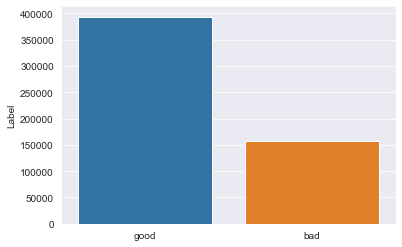

In [10]:
sns.set_style('darkgrid')
sns.barplot(lbl_counts.index, lbl_counts.Label)

### <font color="#ff8882"> Preprocessing</font>
* So, now that we have the data, we have to vectorize our URLs. So, I'm using CountVectorizer to gather words using tokenizer, since there are words in urls that are more important than other words such as:
    1. -> Virus
    2. -> .exe
    3. -> .dat
* Let's convert the URLs into a vector form.

### <font color="#1597bb">Regexp Tokenizer</font>
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [11]:
# We use Regexp tokenizers to split words from text:
from nltk.tokenize import RegexpTokenizer

In [12]:
# In this expression we are spliting only alphabets
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [13]:
'''For example here you can see lots of numbers, symbols, dots, etc which
is not important to your data so we remove this and get only strings of alphabets.''' 
print(phishing_data.URL[0]) # This 0 is first row

nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526


In [14]:
# This command will only pull all the alphabet strings present in URL:
clean_text = tokenizer.tokenize(phishing_data.URL[0]) 
print(clean_text)

['nobell', 'it', 'ffb', 'd', 'dca', 'cce', 'f', 'login', 'SkyPe', 'com', 'en', 'cgi', 'bin', 'verification', 'login', 'ffb', 'd', 'dca', 'cce', 'f', 'index', 'php', 'cmd', 'profile', 'ach', 'outdated', 'page', 'tmpl', 'p', 'gen', 'failed', 'to', 'load', 'nav', 'login', 'access']


### <font color="#ff1a75">⏰ Time module</font>

In [15]:
# So now we transform all the URLs to clean_text:
# To calculate time of execution we import time
import time
start = time.time()
phishing_data['text_tokenized'] = phishing_data.URL.map(lambda text: tokenizer.tokenize(text))
end = time.time()
time_req = end - start
formatted_time = "{:.2f}".format(time_req)
print(f"Time required to tokenize text is: \n{formatted_time} sec")

Time required to tokenize text is: 
3.04 sec


In [16]:
# Now let's check some sample results of URLs conversion to tokenize text:
phishing_data.sample(7)

,URL,Label,text_tokenized
301210,cduniverse.com/productinfo.asp?pid=7506614,good,"[cduniverse, com, productinfo, asp, pid]"
292666,blainejensenrv.com/travel-trailer-toyhauler/20...,good,"[blainejensenrv, com, travel, trailer, toyhaul..."
54080,www.aim-users.com/3bbs.htm,good,"[www, aim, users, com, bbs, htm]"
258791,wiki.answers.com/Q/What_is_the_Flintstones_nei...,good,"[wiki, answers, com, Q, What, is, the, Flintst..."
58596,www.dsi.unifi.it/neural,good,"[www, dsi, unifi, it, neural]"
493404,copy.com/s8w9tqqzVDaXIkcR/הריגתו של קצין ביטחו...,bad,"[copy, com, s, w, tqqzVDaXIkcR, rar, download]"
518590,21oq88trjd.drefcvest.in/s1eji0kjw1\n,bad,"[oq, trjd, drefcvest, in, s, eji, kjw, n]"


### <font color="#f875aa">Snowball Stemmer NLTK</font>
* Snowball is a small string processing language designed for creating stemming algorithms for use in Information Retrieval.

In [17]:
# Now we use Snowball stemmer to get the root words out of tokenized text:
from nltk.stem.snowball import SnowballStemmer

In [18]:
# I am using english language for stemming purpose you can choose any language:
sbs = SnowballStemmer("english")

# we will see the execution time to stem the tokenize text:
start = time.time()
phishing_data['text_stemmed'] = phishing_data['text_tokenized'].map(lambda text: [sbs.stem(word) for word in text])
end = time.time()
time_req = end - start
formatted_time = "{:.2f}".format(time_req)
print(f"⏳ Time required for stemming all the tokenized text is: \n{formatted_time} sec")

⏳ Time required for stemming all the tokenized text is: 
77.52 sec


In [19]:
# Now let's see the sample stemmed text:
phishing_data.sample(7)

,URL,Label,text_tokenized,text_stemmed
118837,sphinxservices.com.au/mnm/index.htm,bad,"[sphinxservices, com, au, mnm, index, htm]","[sphinxservic, com, au, mnm, index, htm]"
163367,dating.poptower.com/delroy-lindo-dating.htm,good,"[dating, poptower, com, delroy, lindo, dating,...","[date, poptow, com, delroy, lindo, date, htm]"
13586,serviceinformation.pakfreewebs.com/verifier/et...,bad,"[serviceinformation, pakfreewebs, com, verifie...","[serviceinform, pakfreeweb, com, verifi, etap,..."
286559,azchords.com/p/planetsmashers-tabs-12218.html,good,"[azchords, com, p, planetsmashers, tabs, html]","[azchord, com, p, planetsmash, tab, html]"
23051,alltomcasinospel.se/images/ind.html,bad,"[alltomcasinospel, se, images, ind, html]","[alltomcasinospel, se, imag, ind, html]"
495042,85.227.8.132/,bad,[],[]
265559,3dtotal.com/tutorial/maya/car_modeling_ford_gt...,good,"[dtotal, com, tutorial, maya, car, modeling, f...","[dtotal, com, tutori, maya, car, model, ford, ..."


In [20]:
# So, now we join the stemmed words together as a sentence:
start = time.time()
phishing_data['text_to_sent'] = phishing_data['text_stemmed'].map(lambda text: ' '.join(text))
end = time.time()
time_req = end - start
formatted_time = "{:.2f}".format(time_req)
print(f"Time required for joining text to sentence is: \n{formatted_time} sec")

Time required for joining text to sentence is: 
0.38 sec


In [21]:
# let's see some sample results of joined text to sentences:
phishing_data.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_to_sent
307937,collingwoodlifestyle.com/,good,"[collingwoodlifestyle, com]","[collingwoodlifestyl, com]",collingwoodlifestyl com
84146,www.mywot.com/en/download/ie,good,"[www, mywot, com, en, download, ie]","[www, mywot, com, en, download, ie]",www mywot com en download ie
218349,music.yahoo.com/norman-brown/,good,"[music, yahoo, com, norman, brown]","[music, yahoo, com, norman, brown]",music yahoo com norman brown
525266,142.47.213.123/Ares13.zip,bad,"[Ares, zip]","[are, zip]",are zip
368778,kittykatrescue.com/,good,"[kittykatrescue, com]","[kittykatrescu, com]",kittykatrescu com
505915,parroquiansg.org/8g74crec/,bad,"[parroquiansg, org, g, crec]","[parroquiansg, org, g, crec]",parroquiansg org g crec
152997,braveastronaut.blogspot.com/,good,"[braveastronaut, blogspot, com]","[braveastronaut, blogspot, com]",braveastronaut blogspot com
180905,en.wikipedia.org/wiki/Strictly_Come_Dancing_(s...,good,"[en, wikipedia, org, wiki, Strictly, Come, Dan...","[en, wikipedia, org, wiki, strict, come, danc,...",en wikipedia org wiki strict come danc seri
105974,mediasmall.com/applicationload/index.html,bad,"[mediasmall, com, applicationload, index, html]","[mediasmal, com, applicationload, index, html]",mediasmal com applicationload index html
284016,artnet.com/artists/charles+ragland-bunnell/bio...,good,"[artnet, com, artists, charles, ragland, bunne...","[artnet, com, artist, charl, ragland, bunnel, ...",artnet com artist charl ragland bunnel biograp...


### <font color="#845ec2">Visualization Part</font>
##### <font color="#3aa6c5">It is very important to know your data and visualize it to understand it better.</font>
    1.Let's visualize some important key words using Wordcloud.

In [22]:
# First we slice the classes as:
phishing_sites = phishing_data[phishing_data.Label == 'bad']
not_phishing_sites = phishing_data[phishing_data.Label == 'good']

In [23]:
# Using head() function to see the top 5 URLs of phishing sites:
phishing_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_to_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [24]:
# Using head() function to see the top 5 URLs of Not phishing sites:
not_phishing_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_to_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [26]:
# Now let's create a function to visualize the important words from URLs:

def my_wordcloud(text, mask=None, max_words=500, max_font_size=70, figure_size=(8.0, 10.0),
                title=None, title_size=70, image_color=False):
    
    stopwords = set(STOPWORDS)
    my_stopwords = {'com', 'http'}
    stopwords = stopwords.union(my_stopwords)
    
    wordcloud = WordCloud(background_color='#fff', 
                         stopwords = stopwords,
                         max_words = max_words,
                         random_state = 42,                            
                         mask = mask)
    
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_color = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors),
                  interpolation='bilinear');
        
        plt.title(title,
                 fontdict={'size': title_size,
                          'verticalalignment': 'bottom'})
        
    else:
        plt.imshow(wordcloud);
        plt.title(title,
                 fontdict={'size': title_size,
                          'color': '#ff3333',
                          'verticalalignment': 'bottom'})

    plt.axis('off');
    plt.tight_layout()

In [27]:
my_data = not_phishing_sites.text_to_sent
my_data.reset_index(drop=True, inplace=True)

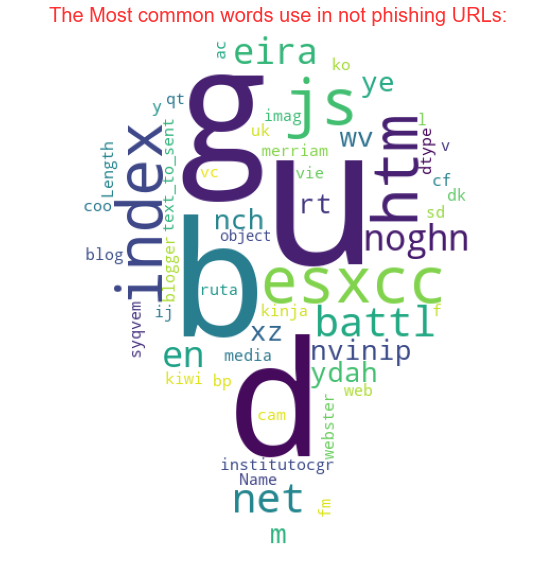

In [28]:
not_phishing_common_text = str(my_data)
common_mask = np.array(Image.open('idea.png'))
my_wordcloud(not_phishing_common_text,
               common_mask,
               max_words=400, 
               max_font_size=50, 
               title = 'The Most common words use in not phishing URLs:',
               title_size=20)

In [29]:
# for phishing sites common words are:
my_data = phishing_sites.text_to_sent
my_data.reset_index(drop=True, inplace=True)

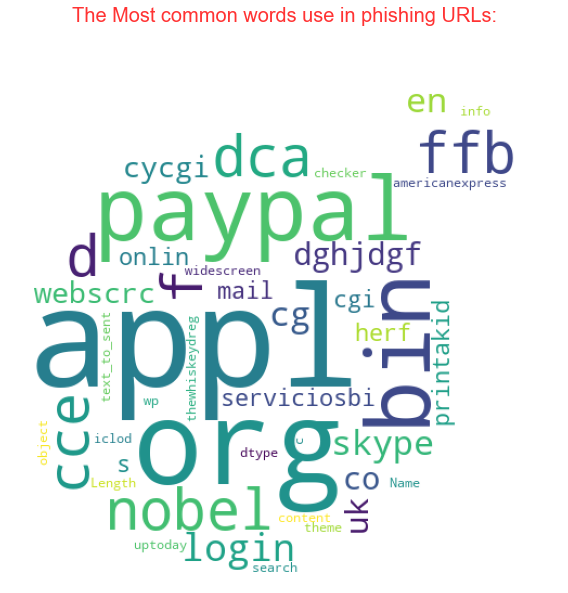

In [30]:
# let's create a wordcloud for phishing sites:
phishing_common_words = str(my_data)
common_mask = np.array(Image.open('target.png'))
my_wordcloud(phishing_common_words, 
             common_mask,
             max_words=500, 
             max_font_size=20, 
             title='The Most common words use in phishing URLs:', 
             title_size=20)

### <font color="#28b5b5">To visualize internal links as it will show us all redirect links.</font>
#### <font color="#ff8882">To Scrape any website</font>
   - Firtly, we nedd to setup the Chrome webdriver so we can scrape dynamic webpages.
   
#### <font color="#f0c929">The Chrome webdriver</font>
   - WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and so on.

In [31]:
# we need to install selenium to use webdriver:
! pip install selenium
! pip install webdriver-manager
# used for automation chrome:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
# This warning is not harmful per-se, and doesn't affect any installation 
# logic. You can safely use the current pip, ignoring this warning for now.

distutils: c:\users\ashhar\anaconda3\Include\UNKNOWN
sysconfig: c:\users\ashhar\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\ashhar\anaconda3\Include\UNKNOWN
sysconfig: c:\users\ashhar\anaconda3\Include
user = False
home = None
root = None
prefix = None


distutils: c:\users\ashhar\anaconda3\Include\UNKNOWN
sysconfig: c:\users\ashhar\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\ashhar\anaconda3\Include\UNKNOWN
sysconfig: c:\users\ashhar\anaconda3\Include
user = False
home = None
root = None
prefix = None




====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\Ashhar\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


- <font color="#ff3399">so now we need to create two lists.</font>
* First, named list_urls holds all the pages you’d like to scrape.
* Secondcreate an empty list where you’ll append links from each page.

In [32]:
# So here we are taking 2 phishing sites in the list:
urls_list = ['http://24fxtradetech.com.cp-16.webhostbox.net/', 'http://www.autoentsorgen.ch/sitemaps.html']
links_with_text = []

- <font color="#3333ff">I took some phishing site to see were the hackers redirect(on different link) us.</font>
* So, to extract only relevant hyperlinks for Google, i.e., links only with '<'a'>' tag with href attributes.

### <font color="#00cccc">BeautifulSoup Library</font>
* It is use for getting data out of HTML, XML, and other markup languages. 

In [33]:
# used for scraping the data from websites:
from bs4 import BeautifulSoup

In [34]:
for url in urls_list:
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

### <font color="#ffb3b3">Turn the URL's into a DataFrame</font>
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [37]:
df.head(10)

,from,to
0,http://24fxtradetech.com.cp-16.webhostbox.net/,Webhostbox.net
1,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Domain_Name_Regist...
2,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Top_10_Domain_Host...
3,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Best_Web_Hosting_P...
4,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Best_Forum_Hosting...
5,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Hosting_Coupon_Cod...
6,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Top_10_Web_Hosting...
7,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Web_Hosting_Offers...
8,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Domain_Name_Regist...
9,http://24fxtradetech.com.cp-16.webhostbox.net/,http://freeresultsguide.com/Top_10_Domain_Host...


### <font color="#3399ff">Draw a graph</font>
* Finally, use the aforementioned DataFrame to visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first and draw it by calling nx.draw

In [38]:
# for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
import networkx as nx

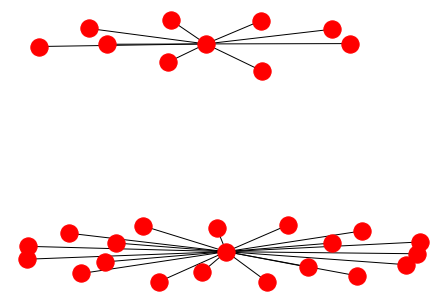

In [89]:
ash = nx.from_pandas_edgelist(df, source='from', target='to')
nx.draw(ash, with_labels=False, node_color="red")

### <font color="#ff3366">Creating Model</font>
* Using CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [40]:
# create sparse matrix of words using regexptokenizes: 
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Now we create a CV object:
CV = CountVectorizer()

In [42]:
# transform all text which we tokenize and stemed:
feature = CV.fit_transform(phishing_data.text_to_sent)

In [43]:
# convert sparse matrix into array to print transformed features:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
# spliting the data between feature and target:
from sklearn.model_selection import train_test_split

# gives whole report about metrics (e.g, recall,precision,f1_score,c_m):
from sklearn.metrics import classification_report

# gives info about actual and predicted:
from sklearn.metrics import confusion_matrix

In [45]:
# Splitting the data:
train_X, test_X, train_Y, test_Y = train_test_split(feature, phishing_data.Label)

### <font color="#e6e600">Logistic Regression</font>
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [46]:
# algo use to predict not phishing site or phishing site: 
from sklearn.linear_model import LogisticRegression

In [47]:
# create an object for Logistic Regression()
lr = LogisticRegression()

In [48]:
lr.fit(train_X, train_Y)

C:\Users\Ashhar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Here we are calculating the score of tests:
lr.score(test_X, test_Y)

0.9635608386317673

### <font color="#00ffaa">LR Score</font>
* Logistic Regression is giving us 96% accuracy, Now we will store scores in dict to see which model perform best of all

In [50]:
Score_ml = {}
Score_ml['Logistic Regression'] = np.round(lr.score(test_X, test_Y), 2)

Training Accuracy:  0.9775064018002638
Testing Accuracy:  0.9635608386317673

Classification Report: 

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36560
        Good       0.99      0.96      0.97    100902

    accuracy                           0.96    137462
   macro avg       0.95      0.96      0.95    137462
weighted avg       0.97      0.96      0.96    137462


confusion Matrix: 



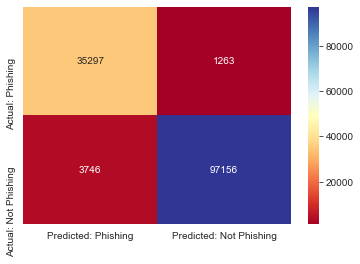

In [51]:
print('Training Accuracy: ',lr.score(train_X, train_Y))
print('Testing Accuracy: ',lr.score(test_X, test_Y))
# here we create confusion matrix:
conf_mat = pd.DataFrame(confusion_matrix(lr.predict(test_X), test_Y),
                       columns = ['Predicted: Phishing', 'Predicted: Not Phishing'],
                       index = ['Actual: Phishing', 'Actual: Not Phishing'])

print('\nClassification Report: \n')
print(classification_report(lr.predict(test_X), test_Y,
                           target_names = ['Bad', 'Good']))

print('\nconfusion Matrix: \n')
plt.figure(figsize = (6, 4))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="RdYlBu")

### <font color="#00bfff">MultinomialNB</font>
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [52]:
# nlp algo use to predict not phishing site or phishing site:
from sklearn.naive_bayes import MultinomialNB

In [53]:
# create mnb object
mnb = MultinomialNB()

In [54]:
mnb.fit(train_X, train_Y)

MultinomialNB()

In [55]:
mnb.score(test_X, test_Y)

0.9569990251851421

### <font color="#ff5500">MultinomialNB Score</font>
* MultinomialNB is giving us 95% accuracy. So, now we will store scores in dict to see which model perform best of all.

In [56]:
Score_ml['MultinomialNB'] = np.round(mnb.score(test_X, test_Y), 2)

Training Accuracy:  0.973949037790021
Testing Accuracy:  0.9569990251851421

Classification Report

              precision    recall  f1-score   support

         Bad       0.91      0.93      0.92     38170
        Good       0.97      0.97      0.97     99292

    accuracy                           0.96    137462
   macro avg       0.94      0.95      0.95    137462
weighted avg       0.96      0.96      0.96    137462


Confusion Matrix



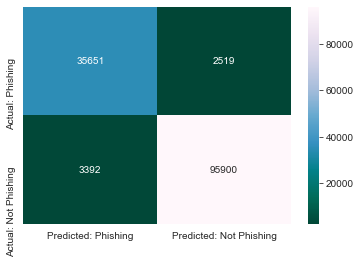

In [57]:
print('Training Accuracy: ',mnb.score(train_X, train_Y))
print('Testing Accuracy: ',mnb.score(test_X, test_Y))

conf_mat = pd.DataFrame(confusion_matrix(mnb.predict(test_X), test_Y),
                       columns = ['Predicted: Phishing', 'Predicted: Not Phishing'],
                       index = ['Actual: Phishing', 'Actual: Not Phishing'])

print('\nClassification Report\n')
print(classification_report(mnb.predict(test_X), test_Y,
                           target_names = ['Bad', 'Good']))

print('\nConfusion Matrix\n')
plt.figure(figsize = (6,4))
sns.heatmap(conf_mat, annot = True, fmt='d', cmap='PuBuGn_r')

Actual Score of Logistic Regression: 
0.9635608386317673

Actual Score of MultinomialNB: 
0.9569990251851421

Final Rounded Score: 
                     Accuracy
Logistic Regression      0.96
MultinomialNB            0.96


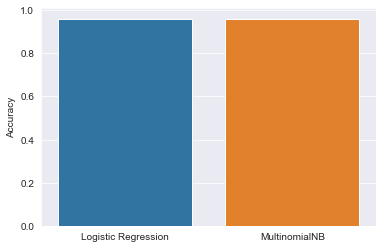

In [58]:
results = pd.DataFrame.from_dict(Score_ml, 
                                 orient = 'index', 
                                 columns = ['Accuracy'])

print(f"Actual Score of Logistic Regression: \n{lr.score(test_X, test_Y)}\n")
print(f"Actual Score of MultinomialNB: \n{mnb.score(test_X, test_Y)}\n")
print(f"Final Rounded Score: \n{results}")

sns.set_style('darkgrid')
sns.barplot(results.index, results.Accuracy)

### <font color="#ff5500">Best fit Model</font>
* In the above results we can clearly see that the Logistic Regression is the best fit model with actual score of 96%.
* So, now we make sklearn pipeline using Logistic Regression.

In [59]:
# Used for combining all preprocessor techniques and algorithms:
from sklearn.pipeline import make_pipeline

In [60]:
# Making a pipeline:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'), LogisticRegression())

In [61]:
train_X, test_X, train_Y, test_Y = train_test_split(phishing_data.URL, phishing_data.Label)

In [62]:
pipeline_ls.fit(train_X, train_Y)

C:\Users\Ashhar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [63]:
pipeline_ls.score(test_X, test_Y)

0.9659760515633411

Traing Accuracy:  0.9807170016295491
Testing Accuracy:  0.9659760515633411

Classification Report 

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36834
        Good       0.99      0.97      0.98    100628

    accuracy                           0.97    137462
   macro avg       0.95      0.97      0.96    137462
weighted avg       0.97      0.97      0.97    137462


Confusion Matrix 



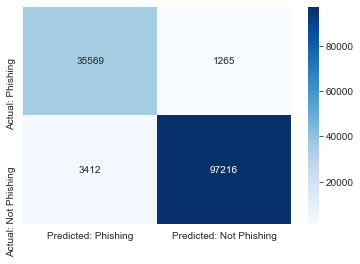

In [64]:
print("Traing Accuracy: ",pipeline_ls.score(train_X, train_Y))
print("Testing Accuracy: ",pipeline_ls.score(test_X, test_Y))

conf_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(test_X), test_Y), 
                       columns = ["Predicted: Phishing", "Predicted: Not Phishing"],
                       index = ["Actual: Phishing", "Actual: Not Phishing"])

print("\nClassification Report \n")
print(classification_report(pipeline_ls.predict(test_X), test_Y,
                            target_names = ['Bad', 'Good']))

print("\nConfusion Matrix \n")
plt.figure(figsize = (6,4))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap="Blues")


In [65]:
# So now we dump our model using pickle:
import pickle
# Python's pickle module is for: it serializes objects so they can be saved to a file, and loaded in a program again later on.

In [66]:
op = open('phishing.pkl', 'rb')
# Here, the 'r' stands for read mode and the 'b' stands for binary mode.

dicts = pickle.load(op, encoding = 'UTF8')
op.close()
print(f"{op}\n")
print(dicts)

<_io.BufferedReader name='phishing.pkl'>

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])


In [67]:
pickle.dump(pipeline_ls, open('phishing.pkl', 'wb'))
# Here, The 'w' means that you'll be writing to the file, and 'b' refers to binary mode.

In [68]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(test_X, test_Y)
print(result)

0.9659760515633411


# <font color="#009999">🙌Conclusion</font>
* That’s it. See, it's that simple yet so effective. We get an accuracy of 96%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it

##### <font color="#ff0000">❌ Bad Links</font> 
* __These are some Phishing links!__
   1. www.yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
   2. www.fazan-pacir.rs/temp/libraries/ipad
   3. www.tubemoviez.exe
   4. www.svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt
   

##### <font color="#77ff33">✔ Good Links</font>
* __These are some not Phishing links!__
   1. www.youtube.com/
   2. www.python.org/
   3. www.google.com/
   4. www.kaggle.com/
   

In [69]:
predict_bad = ['www.yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
               'www.fazan-pacir.rs/temp/libraries/ipad',
               'www.tubemoviez.exe/',
               'www.svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']

predict_good = ['www.youtube.com/',
                'www.python.org/',
                'www.google.com/',
                'www.kaggle.com/']

loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)

result_1 = loaded_model.predict(predict_bad)
result_2 = loaded_model.predict(predict_good)

In [70]:
print(f"{result_1} \n {'-'*26} \n{result_2}")

['bad' 'bad' 'bad' 'bad'] 
 -------------------------- 
['good' 'good' 'good' 'good']


# `Project Terminated Here... 😎`